In [1]:
import torch
import torchvision

In [2]:
LR = 0.001
DOWNLOAD = True
DATA = 'datasets/cifar10/'
device = 'mps'

In [3]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(
        root=DATA,
        train=True,
        transform=transform,
        download=DOWNLOAD
)

train_loader = torch.utils.data.DataLoader(
        dataset=train_dataset,
        batch_size=128,
        
)

Files already downloaded and verified


In [4]:
model = torchvision.models.resnet50()
model.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = LR, momentum=0.9)

In [6]:
%%time

loss_plot = []

for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    loss_plot.append(loss.item())
    print('batch_idx: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        batch_idx, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))

batch_idx: 0 [0/50000 (0%)]	Loss: 6.943012
batch_idx: 1 [128/50000 (0%)]	Loss: 6.695899
batch_idx: 2 [256/50000 (1%)]	Loss: 6.419430
batch_idx: 3 [384/50000 (1%)]	Loss: 5.991481
batch_idx: 4 [512/50000 (1%)]	Loss: 5.373922
batch_idx: 5 [640/50000 (1%)]	Loss: 4.971287
batch_idx: 6 [768/50000 (2%)]	Loss: 4.291334
batch_idx: 7 [896/50000 (2%)]	Loss: 3.771053
batch_idx: 8 [1024/50000 (2%)]	Loss: 3.144317
batch_idx: 9 [1152/50000 (2%)]	Loss: 2.785835
batch_idx: 10 [1280/50000 (3%)]	Loss: 2.697331
batch_idx: 11 [1408/50000 (3%)]	Loss: 2.587021
batch_idx: 12 [1536/50000 (3%)]	Loss: 2.573080
batch_idx: 13 [1664/50000 (3%)]	Loss: 2.371071
batch_idx: 14 [1792/50000 (4%)]	Loss: 2.319058
batch_idx: 15 [1920/50000 (4%)]	Loss: 2.376086
batch_idx: 16 [2048/50000 (4%)]	Loss: 2.315690
batch_idx: 17 [2176/50000 (4%)]	Loss: 2.406834
batch_idx: 18 [2304/50000 (5%)]	Loss: 2.370421
batch_idx: 19 [2432/50000 (5%)]	Loss: 2.415955
batch_idx: 20 [2560/50000 (5%)]	Loss: 2.329661
batch_idx: 21 [2688/50000 (5%)]	L

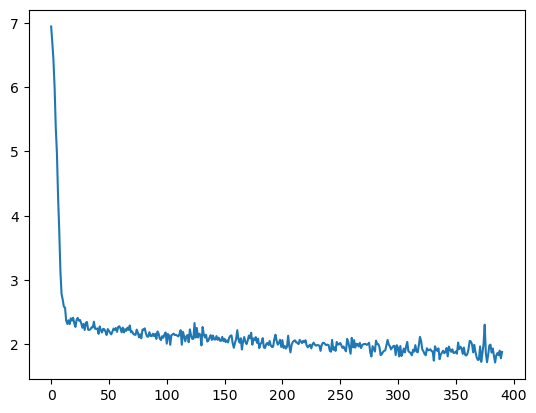

In [7]:
import matplotlib.pyplot as plt

X = range(len(loss_plot))
Y = loss_plot
plt.plot(X, Y)
plt.show()

In [8]:
torch.save({
     'model_state_dict': model.state_dict(),
     'optimizer_state_dict': optimizer.state_dict(),
     }, 'checkpoint.pth')

In [9]:
%%time

model.eval()

test_dataset = torchvision.datasets.CIFAR10(
        root=DATA,
        train=False,
        transform=transform,
        download=DOWNLOAD
)

test_loader = torch.utils.data.DataLoader(
        dataset=test_dataset,
        batch_size=128,
)

correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Files already downloaded and verified
Accuracy of the network on the 10000 test images: 31 %
CPU times: user 7.78 s, sys: 5.24 s, total: 13 s
Wall time: 23.2 s


In [11]:
%%time

model.train()

for epoch in range(10):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        loss_plot.append(loss.item())
        print('batch_idx: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            batch_idx, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item()))

batch_idx: 0 [0/50000 (0%)]	Loss: 2.082625
batch_idx: 1 [128/50000 (0%)]	Loss: 1.832122
batch_idx: 2 [256/50000 (1%)]	Loss: 1.893903
batch_idx: 3 [384/50000 (1%)]	Loss: 1.885624
batch_idx: 4 [512/50000 (1%)]	Loss: 1.872709
batch_idx: 5 [640/50000 (1%)]	Loss: 1.926328
batch_idx: 6 [768/50000 (2%)]	Loss: 2.091241
batch_idx: 7 [896/50000 (2%)]	Loss: 1.810201
batch_idx: 8 [1024/50000 (2%)]	Loss: 1.891395
batch_idx: 9 [1152/50000 (2%)]	Loss: 1.803264
batch_idx: 10 [1280/50000 (3%)]	Loss: 1.728893
batch_idx: 11 [1408/50000 (3%)]	Loss: 1.824988
batch_idx: 12 [1536/50000 (3%)]	Loss: 1.905513
batch_idx: 13 [1664/50000 (3%)]	Loss: 1.793182
batch_idx: 14 [1792/50000 (4%)]	Loss: 1.790578
batch_idx: 15 [1920/50000 (4%)]	Loss: 1.889132
batch_idx: 16 [2048/50000 (4%)]	Loss: 1.726888
batch_idx: 17 [2176/50000 (4%)]	Loss: 1.914003
batch_idx: 18 [2304/50000 (5%)]	Loss: 1.745019
batch_idx: 19 [2432/50000 (5%)]	Loss: 1.830690
batch_idx: 20 [2560/50000 (5%)]	Loss: 1.841896
batch_idx: 21 [2688/50000 (5%)]	L

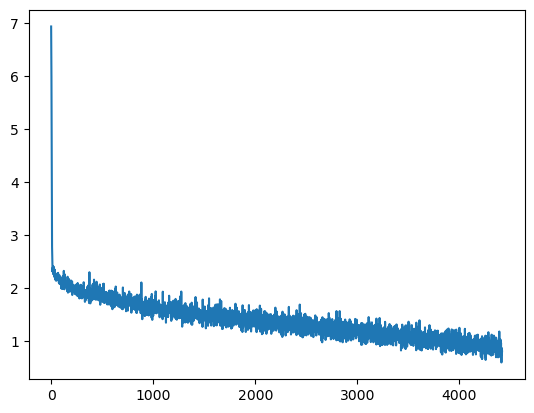

In [14]:
X = range(len(loss_plot))
Y = loss_plot
plt.plot(X, Y)
plt.show()

In [12]:
torch.save({
     'model_state_dict': model.state_dict(),
     'optimizer_state_dict': optimizer.state_dict(),
     }, 'checkpoint.pth')

In [13]:
%%time

model.eval()

correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 58 %
CPU times: user 6.6 s, sys: 6.28 s, total: 12.9 s
Wall time: 23.9 s


In [5]:
checkpoint = torch.load('checkpoint.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [21]:
%%time

model.train()

for epoch in range(10):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        print('batch_idx: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            batch_idx, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item()))

batch_idx: 0 [0/50000 (0%)]	Loss: 0.000309
batch_idx: 1 [128/50000 (0%)]	Loss: 0.000363
batch_idx: 2 [256/50000 (1%)]	Loss: 0.000313
batch_idx: 3 [384/50000 (1%)]	Loss: 0.000350
batch_idx: 4 [512/50000 (1%)]	Loss: 0.000337
batch_idx: 5 [640/50000 (1%)]	Loss: 0.000342
batch_idx: 6 [768/50000 (2%)]	Loss: 0.000416
batch_idx: 7 [896/50000 (2%)]	Loss: 0.000273
batch_idx: 8 [1024/50000 (2%)]	Loss: 0.000353
batch_idx: 9 [1152/50000 (2%)]	Loss: 0.000410
batch_idx: 10 [1280/50000 (3%)]	Loss: 0.000367
batch_idx: 11 [1408/50000 (3%)]	Loss: 0.000357
batch_idx: 12 [1536/50000 (3%)]	Loss: 0.000300
batch_idx: 13 [1664/50000 (3%)]	Loss: 0.000280
batch_idx: 14 [1792/50000 (4%)]	Loss: 0.000369
batch_idx: 15 [1920/50000 (4%)]	Loss: 0.000277
batch_idx: 16 [2048/50000 (4%)]	Loss: 0.000287
batch_idx: 17 [2176/50000 (4%)]	Loss: 0.000292
batch_idx: 18 [2304/50000 (5%)]	Loss: 0.000282
batch_idx: 19 [2432/50000 (5%)]	Loss: 0.000337
batch_idx: 20 [2560/50000 (5%)]	Loss: 0.000327
batch_idx: 21 [2688/50000 (5%)]	L

In [23]:
torch.save({
     'model_state_dict': model.state_dict(),
     'optimizer_state_dict': optimizer.state_dict(),
     }, 'checkpoint.pth')

In [24]:
checkpoint = torch.load('checkpoint.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [25]:
%%time

model.eval()

test_dataset = torchvision.datasets.CIFAR10(
        root=DATA,
        train=False,
        transform=transform,
        download=DOWNLOAD
)

test_loader = torch.utils.data.DataLoader(
        dataset=test_dataset,
        batch_size=128,
)

correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Files already downloaded and verified
Accuracy of the network on the 10000 test images: 65 %
CPU times: user 7.79 s, sys: 5.71 s, total: 13.5 s
Wall time: 23.7 s
